In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.drop("User ID",axis=1,inplace=True)

In [5]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
dataset.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

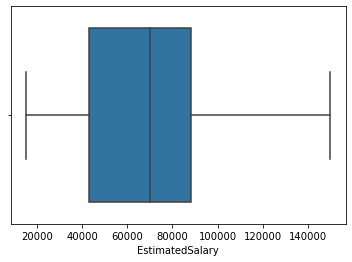

In [7]:
sns.boxplot(dataset["EstimatedSalary"])

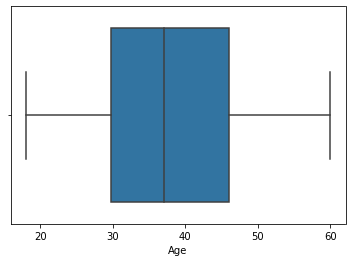

In [8]:
sns.boxplot(dataset["Age"])

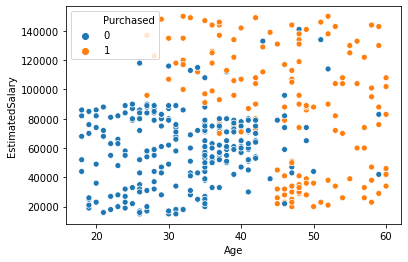

In [9]:
sns.scatterplot(dataset["Age"],dataset["EstimatedSalary"],hue=dataset["Purchased"])

In [10]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


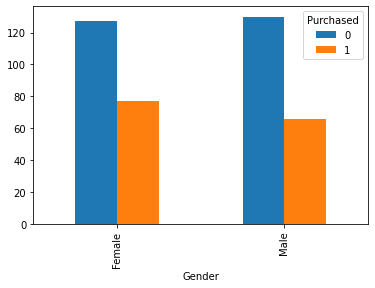

In [11]:
pd.crosstab(dataset["Gender"],dataset["Purchased"]).plot(kind="bar")

In [12]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
dataset=pd.get_dummies(dataset,columns=["Gender"])

In [14]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [15]:
x=dataset.iloc[:,0:2]#rows,colums

In [16]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
y=dataset["Purchased"]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [168]:

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1000)

In [169]:
x_train

,Age,EstimatedSalary
269,40,61000
389,48,35000
232,40,107000
89,35,50000
236,40,57000
...,...,...
350,38,113000
251,37,52000
192,29,43000
71,24,27000


#### Building the model

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
#Init the model=-
dt_model=DecisionTreeClassifier(criterion="entropy",min_samples_split=20,min_samples_leaf=25)

In [252]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25,
                       min_samples_split=20)

In [253]:
#dt_model--Trained Model

### Prediction

In [254]:
y_pred=dt_model.predict(x_test)

In [255]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [256]:
y_test

220    0
4      0
230    1
55     0
312    0
      ..
157    0
319    0
246    0
358    1
245    1
Name: Purchased, Length: 80, dtype: int64

In [257]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [258]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [261]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 92.5 %


In [262]:
y_pred_train=dt_model.predict(x_train)

In [263]:
y_train

269    0
389    1
232    1
89     0
236    0
      ..
350    1
251    0
192    0
71     0
87     0
Name: Purchased, Length: 320, dtype: int64

In [264]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train)*100,"%")

Train Accuracy: 91.25 %


In [265]:
cf_test=confusion_matrix(y_test,y_pred)

In [266]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26b457e1948>)

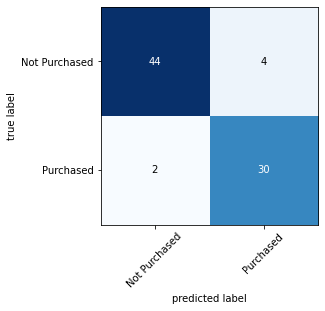

In [267]:
plot_confusion_matrix(cf_test,class_names=["Not Purchased","Purchased"])

In [268]:
cf_train=confusion_matrix(y_train,y_pred_train)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26b433c5748>)

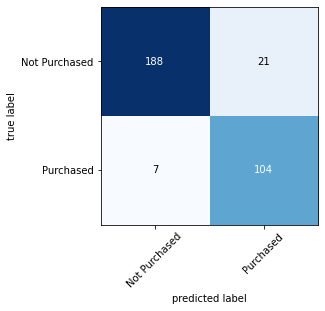

In [269]:
plot_confusion_matrix(cf_train,class_names=["Not Purchased","Purchased"])

In [270]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [271]:
dataset["Purchased"].value_counts()/dataset.shape[0]

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [272]:
from mlxtend.plotting import plot_decision_regions

In [273]:
x_train.values

array([[    40,  61000],
       [    48,  35000],
       [    40, 107000],
       [    35,  50000],
       [    40,  57000],
       [    24,  32000],
       [    33,  43000],
       [    42,  73000],
       [    31,  71000],
       [    60,  42000],
       [    36, 125000],
       [    40,  57000],
       [    48, 134000],
       [    24,  19000],
       [    24,  23000],
       [    36,  33000],
       [    38,  71000],
       [    47, 144000],
       [    20,  82000],
       [    37, 137000],
       [    20,  82000],
       [    36,  99000],
       [    33,  28000],
       [    40,  47000],
       [    60, 102000],
       [    46,  88000],
       [    35, 108000],
       [    38,  65000],
       [    35,  75000],
       [    31,  34000],
       [    50,  20000],
       [    58,  95000],
       [    55, 130000],
       [    41,  45000],
       [    53, 104000],
       [    26,  86000],
       [    27,  84000],
       [    24,  55000],
       [    42,  80000],
       [    30, 107000],


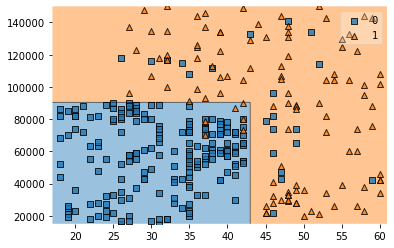

In [274]:
plot_decision_regions(x_train.values,y_train.values,clf=dt_model)

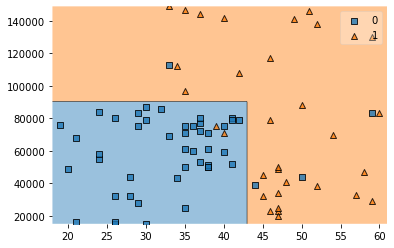

In [275]:
plot_decision_regions(x_test.values,y_test.values,clf=dt_model)

In [276]:
x_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [277]:
x_train.head()

,Age,EstimatedSalary
269,40,61000
389,48,35000
232,40,107000
89,35,50000
236,40,57000


In [278]:
from sklearn.tree import plot_tree

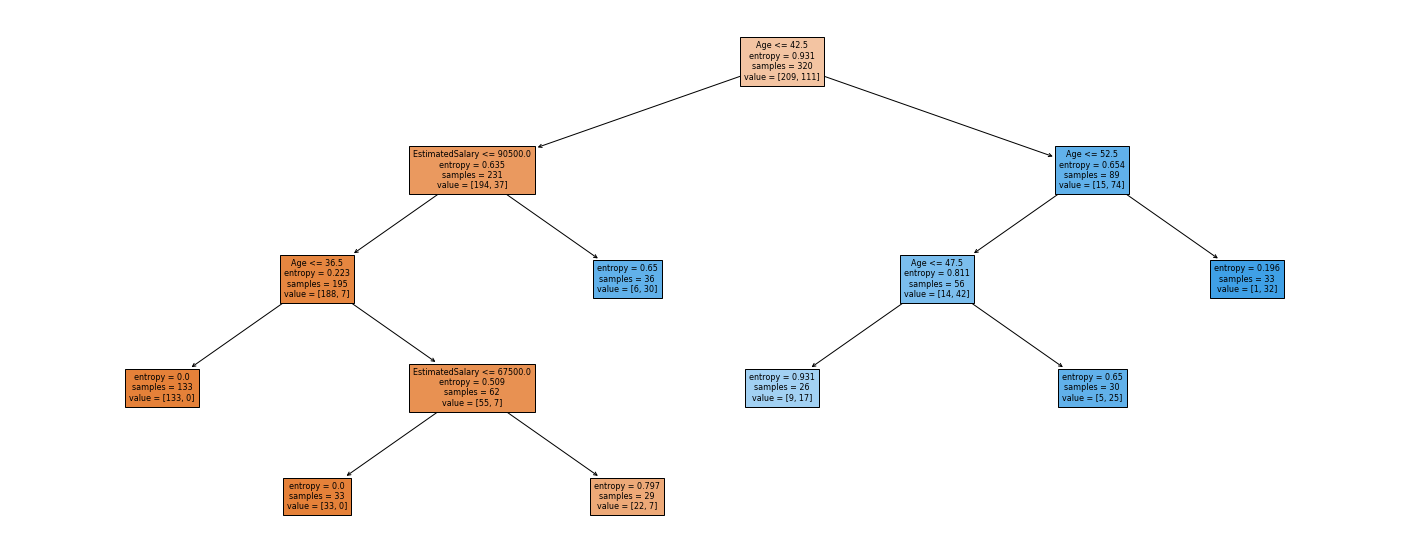

In [279]:
plt.figure(figsize=(25,10))
plot_tree(dt_model,fontsize=8,filled=True,feature_names=x_train.columns)
plt.show()

In [150]:
x_train[x_train["Age"]<=44.5]

,Age,EstimatedSalary
3,27,57000
202,39,134000
250,44,39000
63,32,120000
248,41,52000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [151]:
y_train.value_counts()

0    205
1    115
Name: Purchased, dtype: int64

In [152]:
from sklearn.metrics import classification_report

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



### ROC AUC Curve

In [154]:
from sklearn.metrics import roc_curve

In [155]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [156]:
fpr

array([0.        , 0.11538462, 1.        ])

In [157]:
tpr

array([0.  , 0.75, 1.  ])

In [158]:
threshold

array([2, 1, 0], dtype=int64)

In [159]:
from sklearn.metrics import roc_auc_score

In [160]:
auc_score=roc_auc_score(y_test,y_pred)

In [161]:
y_test,y_pred

(209    0
 280    1
 33     0
 210    1
 93     0
       ..
 246    0
 227    1
 369    1
 176    0
 289    1
 Name: Purchased, Length: 80, dtype: int64,
 array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64))

In [162]:
auc_score

0.8173076923076922

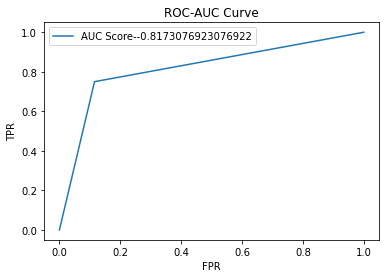

In [163]:
plt.plot(fpr,tpr,label="AUC Score--"+str(auc_score))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

### Real time prediction

In [71]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [72]:
age=35
salary=40000
gender="Male"

In [73]:
data=[[age,salary]]

In [74]:
data

[[35, 40000]]

In [75]:
dt_model.predict(data)

array([0], dtype=int64)

### K Fold Cross validation

In [187]:
from sklearn.model_selection import cross_val_score

In [189]:
dt_model=DecisionTreeClassifier(criterion="entropy")

In [194]:
#Estimator==Model
#Data
#scoring
#cv--k --No of folds
#n_jobs --No od parallel workers--MultiProcessing 
#verbose--Priting model buiding status messages
cv_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=5,n_jobs=4,verbose=10)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0210s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [195]:
cv_score

array([0.859375, 0.890625, 0.859375, 0.9375  , 0.875   ])

In [196]:
cv_score.mean()

0.884375

### Grid Search CV

In [280]:
np.linspace(5, 30, 6,dtype="int")

array([ 5, 10, 15, 20, 25, 30])

In [281]:

max_features = ['auto', 'sqrt','log2']
max_depth = np.linspace(5, 30, 6,dtype="int")
min_samples_split = [2, 5, 10, 12,15,30,50,100]
min_samples_leaf = [1, 2, 5, 10,20,30,35]
criterion=["gini","entropy"]

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
param_grid={"max_features":max_features,"max_depth":max_depth,
            "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf,
           "criterion":criterion}

In [284]:
param_grid

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': array([ 5, 10, 15, 20, 25, 30]),
 'min_samples_split': [2, 5, 10, 12, 15, 30, 50, 100],
 'min_samples_leaf': [1, 2, 5, 10, 20, 30, 35],
 'criterion': ['gini', 'entropy']}

In [310]:
dt_model=DecisionTreeClassifier(random_state=50)

In [311]:
#Estimator--Model
#param_grid--Grid of hyperparameters
#Scoring--Model Performance Measurement
#n_jobs--multi processing
#cv--k --no of folds
#verbose--To print the status messages
gsv=GridSearchCV(dt_model,param_grid,scoring="accuracy", n_jobs=-1,cv=5,verbose=10)

In [312]:
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1990s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1988s.) Setting batch_size=4.
[Parallel(n_j

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30, 35],
                         'min_samples_split': [2, 5, 10, 12, 15, 30, 50, 100]},
             scoring='accuracy', verbose=10)

In [313]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12}

In [314]:
gsv.best_score_

0.9125

In [315]:
gsv.best_index_

19

In [316]:
gsv.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=12, random_state=50)

In [317]:
dt_best_model=gsv.best_estimator_

In [318]:
y_pred=dt_best_model.predict(x_test)

In [319]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [320]:
y_test

220    0
4      0
230    1
55     0
312    0
      ..
157    0
319    0
246    0
358    1
245    1
Name: Purchased, Length: 80, dtype: int64

In [321]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [322]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [323]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 88.75 %


### Random Search CV

In [324]:
from sklearn.model_selection import RandomizedSearchCV

In [325]:
dt_model=DecisionTreeClassifier()

In [326]:
param_dist={"max_features":max_features,"max_depth":max_depth,
            "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf,
           "criterion":criterion}

In [327]:
param_dist

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': array([ 5, 10, 15, 20, 25, 30]),
 'min_samples_split': [2, 5, 10, 12, 15, 30, 50, 100],
 'min_samples_leaf': [1, 2, 5, 10, 20, 30, 35],
 'criterion': ['gini', 'entropy']}

In [340]:
#Estimator--Model
#param_grid--Grid of hyperparameters
#n_iter--no of combinations
#Scoring--Model Performance Measurement
#n_jobs--multi processing
#cv--k --no of folds
#verbose--To print the status messages
rsv=RandomizedSearchCV(dt_model,param_dist,n_iter=500,scoring="accuracy", n_jobs=-1,cv=5,verbose=10)

In [341]:
rsv.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0400s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1972s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.6s
[Parallel(n_j

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             30, 35],
                                        'min_samples_split': [2, 5, 10, 12, 15,
                                                              30, 50, 100]},
                   scoring='accuracy', verbose=10)

In [342]:
rsv.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy'}

In [343]:
rsv.best_score_

0.909375

In [344]:
dt_model_rsv=rsv.best_estimator_

In [345]:
y_pred=dt_model_rsv.predict(x_test)

In [346]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [347]:
y_test

220    0
4      0
230    1
55     0
312    0
      ..
157    0
319    0
246    0
358    1
245    1
Name: Purchased, Length: 80, dtype: int64

In [348]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [349]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [350]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 88.75 %
